read train files: 25000
read test files: 25000
Start to run multi-layer perceptron model 
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4597 - accuracy: 0.7584 - val_loss: 0.2961 - val_accuracy: 0.8746
Epoch 2/2
25000/25000 [==============================] - 42s 2ms/step - loss: 0.1663 - accuracy: 0.9388 - val_loss: 0.3128 - val_accuracy: 0.8734
Finish running multi-layer perceptron model 
Start to run One-Dimensional Convolutional Neural Network Model 
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4763 - accuracy: 0.7359 - val_loss: 0.2817 - val_accuracy: 0.8826
Epoch 2/2
25000/25000 [==============================] - 38s 2ms/step - loss: 0.2111 - accuracy: 0.9154 - val_loss: 0.3117 - val_accuracy: 0.8684
Finish running One-Dimensional Convolutional Neural Network Model 
Start to run lstm model model 
Train on 25000 sam

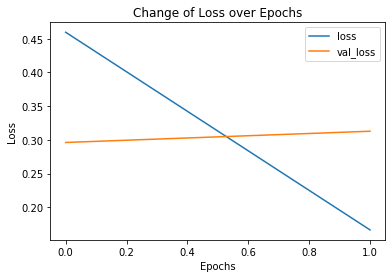

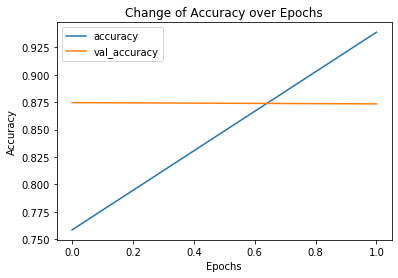

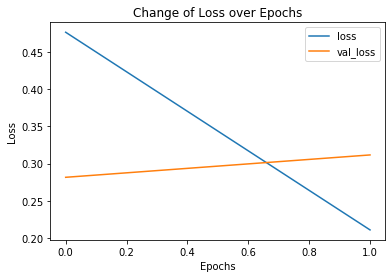

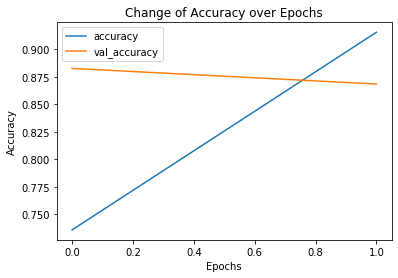

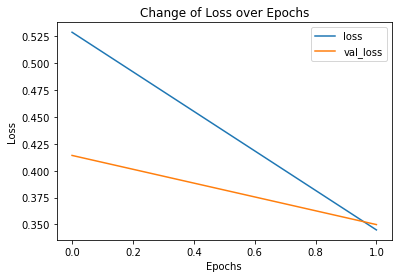

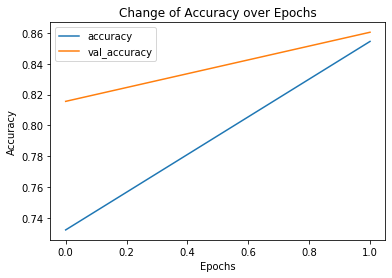

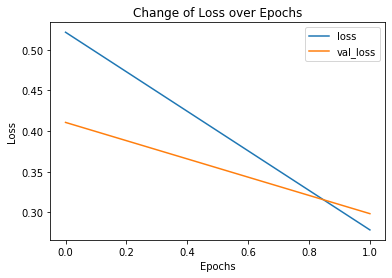

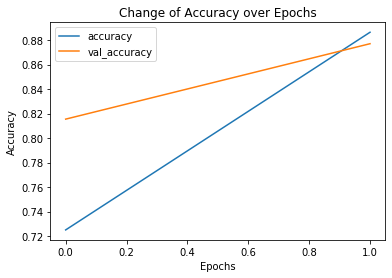

In [4]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from keras.preprocessing import sequence 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM


class Lmdb_model:
    
    def __init__(self,max_features,maxlen):
        self.path =  "E:\\ml_project\\aclImdb_v1.tar\\aclImdb_v1\\aclImdb\\"
        self.max_features = max_features
        self.maxlen = maxlen
        
    def rm_tags(self,text):
        re_tag = re.compile(r'<[^>]+>')
        return re_tag.sub('',text)
    
    def read_files(self,filetype):
        file_list=[]
        positive_path=self.path + filetype+"\\pos\\"
        for f in os.listdir(positive_path):
            file_list+=[positive_path+f]   
        negative_path=self.path + filetype+"\\neg\\"
        for f in os.listdir(negative_path):
            file_list+=[negative_path+f]      
        print('read',filetype, 'files:',len(file_list))      
        all_labels = ([1] * 12500 + [0] * 12500)    
        all_texts  = []
        for fi in file_list:
            with open(fi,encoding='utf8') as file_input:
                filelines = file_input.readlines()       
                all_texts += [self.rm_tags(filelines[0])]         
        return all_labels,all_texts
    
    def get_train_test_data(self):
        y_train, x_train = self.read_files('train')
        y_test, x_test = self.read_files('test')
        token = Tokenizer(num_words=self.max_features,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ')
        token.fit_on_texts(x_train)
        x_train_seq = token.texts_to_sequences(x_train)
        x_test_seq = token.texts_to_sequences(x_test)
        x_train_v = sequence.pad_sequences(x_train_seq,maxlen=self.maxlen)
        x_test_v =  sequence.pad_sequences(x_test_seq,maxlen=self.maxlen)
        return x_train_v,x_test_v,y_train,y_test
    
    #  multi-layer perceptron model 
    def mlp_model(self,x_train_v,x_test_v,y_train,y_test):
        print('Start to run multi-layer perceptron model ')
        model = Sequential()
        model.add(Embedding(self.max_features, 32, input_length= self.maxlen))
        model.add(Flatten())
        model.add(Dense(250, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        mlp = model.fit(x_train_v, y_train, validation_data=(x_test_v, y_test), epochs=2, batch_size=128, verbose=1)
        print('Finish running multi-layer perceptron model ')
        return mlp
    
    # One-Dimensional Convolutional Neural Network Model
    def cnn_model(self,x_train_v,x_test_v,y_train,y_test):
        print('Start to run One-Dimensional Convolutional Neural Network Model ')
        model = Sequential()
        model.add(Embedding(self.max_features, 32, input_length= self.maxlen))
        model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(250, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        cnn = model.fit(x_train_v, y_train, validation_data=(x_test_v, y_test), epochs=2, batch_size=128, verbose=1)
        print('Finish running One-Dimensional Convolutional Neural Network Model ')
        return cnn
    
    # lstm model
    def lstm_model(self,x_train_v,x_test_v,y_train,y_test):
        print('Start to run lstm model model ')
        model = Sequential()
        model.add(Embedding(self.max_features, 32, input_length= self.maxlen))
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        lstm = model.fit(x_train_v, y_train, validation_data=(x_test_v, y_test), epochs=2, batch_size=128, verbose=1)
        print('Finish running lstm model ')
        return lstm
    
    # Bidirectional lstm model
    def blstm_model(self,x_train_v,x_test_v,y_train,y_test):
        print('Start to run Bidirectional lstm  model ')
        model = Sequential()
        model.add(Embedding(self.max_features, 32, input_length= self.maxlen))
        model.add(Bidirectional(LSTM(32, return_sequences = True)))
        model.add(GlobalMaxPool1D())
        model.add(Dense(20, activation="relu"))
        model.add(Dropout(0.05))
        model.add(Dense(1, activation="sigmoid"))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        blstm = model.fit(x_train_v, y_train, validation_data=(x_test_v, y_test), epochs=2, batch_size=128, verbose=1)
        print('Finish running Bidirectional lstm model ')
        return blstm
    
    def history_plot(self,model):
        plt.plot(model.history['loss'])
        plt.plot(model.history['val_loss'], '')
        plt.xlabel("Epochs")
        plt.ylabel('Loss')
        plt.title('Change of Loss over Epochs')
        plt.legend(['loss', 'val_loss'])
        plt.show()
        plt.plot(model.history['accuracy'])
        plt.plot(model.history['val_accuracy'], '')
        plt.xlabel("Epochs")
        plt.ylabel('Accuracy')
        plt.title('Change of Accuracy over Epochs')
        plt.legend(['accuracy', 'val_accuracy'])
        plt.show()
    def main(self):
        x_train_v,x_test_v,y_train,y_test = self.get_train_test_data()
        mlp = self.mlp_model(x_train_v,x_test_v,y_train,y_test)
        cnn_model = self.cnn_model(x_train_v,x_test_v,y_train,y_test)
        lstm_model = self.lstm_model(x_train_v,x_test_v,y_train,y_test)
        blstm_model = self.blstm_model(x_train_v,x_test_v,y_train,y_test)
        self.history_plot(mlp)
        self.history_plot(cnn_model)
        self.history_plot(lstm_model)
        self.history_plot(blstm_model)
        
lmdb = Lmdb_model(max_features = 6000 , maxlen = 500)
lmdb.main()